<a href="https://colab.research.google.com/github/Dk8976/College-Practical/blob/main/Expt5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Diabetes data set from UCI
#Univariate analysis: Frequency, Median, Mode, Variance, Standard Deviatio,
#skewness and Kurtosisimport numpy as np
import numpy as np
import pandas as pd
import statistics as st
#Load the data
df=pd.read_csv("diabetes.csv")
print(df.shape)
print(df.info())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [3]:
#univariate Analysis of diabetes dataset
print('MEAN:\n',df.mean())
print('MEDIAN:\n',df.median())
print('MODE:\n',df.mode())
print('STANDARD DEVIATION:\n',df.std())
print('VARIANCE:\n',df.var())
print('SKEWNESS:\n',df.skew())
print('KURTOSIS:\n',df.kurtosis())
df.describe()

MEAN:
 Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64
MEDIAN:
 Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64
MODE:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0       99           70.0            0.0      0.0  32.0   
1          NaN      100            NaN            NaN      NaN   NaN   

   DiabetesPedigreeFunction   Age  Outcome  
0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

diabetes=datasets.load_diabetes()
diabetes.keys() #to find the content of data

df=pd.DataFrame(diabetes['data'],columns=diabetes['feature_names']) #putting our data in a Dataframe

x=df
y=diabetes['target']

from sklearn.model_selection import train_test_split #to split our data into training and testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101) #splitting our data

#importing Model
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_train,y_train) #Training data is used always
#prediction of testest result of the prepared model
y_pre=model.predict(x_test) #puts the test feature value to get the label value
#which are predicted by the mmodel

#Cross Validation Scores
from sklearn.model_selection import cross_val_score #importing
scores=cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-
scores).mean() #calculating  root mean sq. of the resulted scores of array
print('Cross validation: ',rmse_scores)

#checking predictions accuracy by r2 scores (values lies between 0 to 1)
from sklearn.metrics import r2_score
print('r^2:',r2_score(y_test,y_pre))

#Calculating Root Mean Square Error
mse=mean_squared_error(y_test,y_pre)
rmse=np.sqrt(mse)
print('RMSE: ',rmse)

#Getting weights and intercepts of model
print("Weights: ",model.coef_)
print("\nIntercept ",model.intercept_)

Cross validation:  54.40461553640237
r^2: 0.45767674177195583
RMSE:  58.009275047551995
Weights:  [  -8.02566358 -308.83945001  583.63074324  299.9976184  -360.68940198
   95.14235214  -93.03306818  118.15005596  662.12887711   26.07401648]

Intercept  153.72029738615726


In [4]:
from sklearn import model_selection
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets 
from sklearn.metrics import mean_squared_error

diabetes=datasets.load_diabetes()
diabetes.keys()

df=pd.DataFrame(diabetes['data'],columns=diabetes['feature_names'])#putting our data in a dataframe

x=df
y=diabetes['target']

from sklearn.model_selection import train_test_split #to split our data into training and testing set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
#splitting our data

#importing model
#from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
#build model
model=LogisticRegression()
model.fit(x_train,y_train)


#Prediction of testset result of the prepared model
y_pre=model.predict(x_test) #puts the  test feature value to get the label value which are predicted by the model
#checking predictions accuracy by r2 scores
from sklearn.metrics import r2_score
print('r^2: ',r2_score(y_test,y_pre))

#calculating root mean square error
mse=mean_squared_error(y_test,y_pre)
rmse=np.sqrt(mse)
print('RMSE: ',rmse)

r^2:  -0.44401265478624397
RMSE:  94.65723681369009


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,linear_model,metrics
import pandas as pd

df=pd.read_csv('diabetes.csv')
data=df[['Age','Glucose','BMI','BloodPressure','Pregnancies']]
target=df[['Outcome']]
print(data)
print(target)
#defining ffeature matrix(X) and response vector(y)
X=data
Y=target

#splitting X and Y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

#create linear regression object
reg=linear_model.LinearRegression()

#train model using the training sets
reg.fit(X_train,Y_train)
Y_predict=reg.predict(X_test)

#regression coefficient
print('Coefficient: ',reg.coef_)

#variance score:
print('Variance score: {}'.format(reg.score(X_test,Y_test)))

#Checking Root Mean Square Error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_predict)
rmse=np.sqrt(mse)
print('RMSE: ',rmse)

     Age  Glucose   BMI  BloodPressure  Pregnancies
0     50      148  33.6             72            6
1     31       85  26.6             66            1
2     32      183  23.3             64            8
3     21       89  28.1             66            1
4     33      137  43.1             40            0
..   ...      ...   ...            ...          ...
763   63      101  32.9             76           10
764   27      122  36.8             70            2
765   30      121  26.2             72            5
766   47      126  30.1             60            1
767   23       93  30.4             70            1

[768 rows x 5 columns]
     Outcome
0          1
1          0
2          1
3          0
4          1
..       ...
763        0
764        0
765        0
766        1
767        0

[768 rows x 1 columns]
Coefficient:  [[ 0.00362921  0.0057603   0.01359201 -0.0022797   0.01903324]]
Variance score: 0.3119613858813981
RMSE:  0.3958061749043919


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff15f7e81d0>,
      dtype=object)

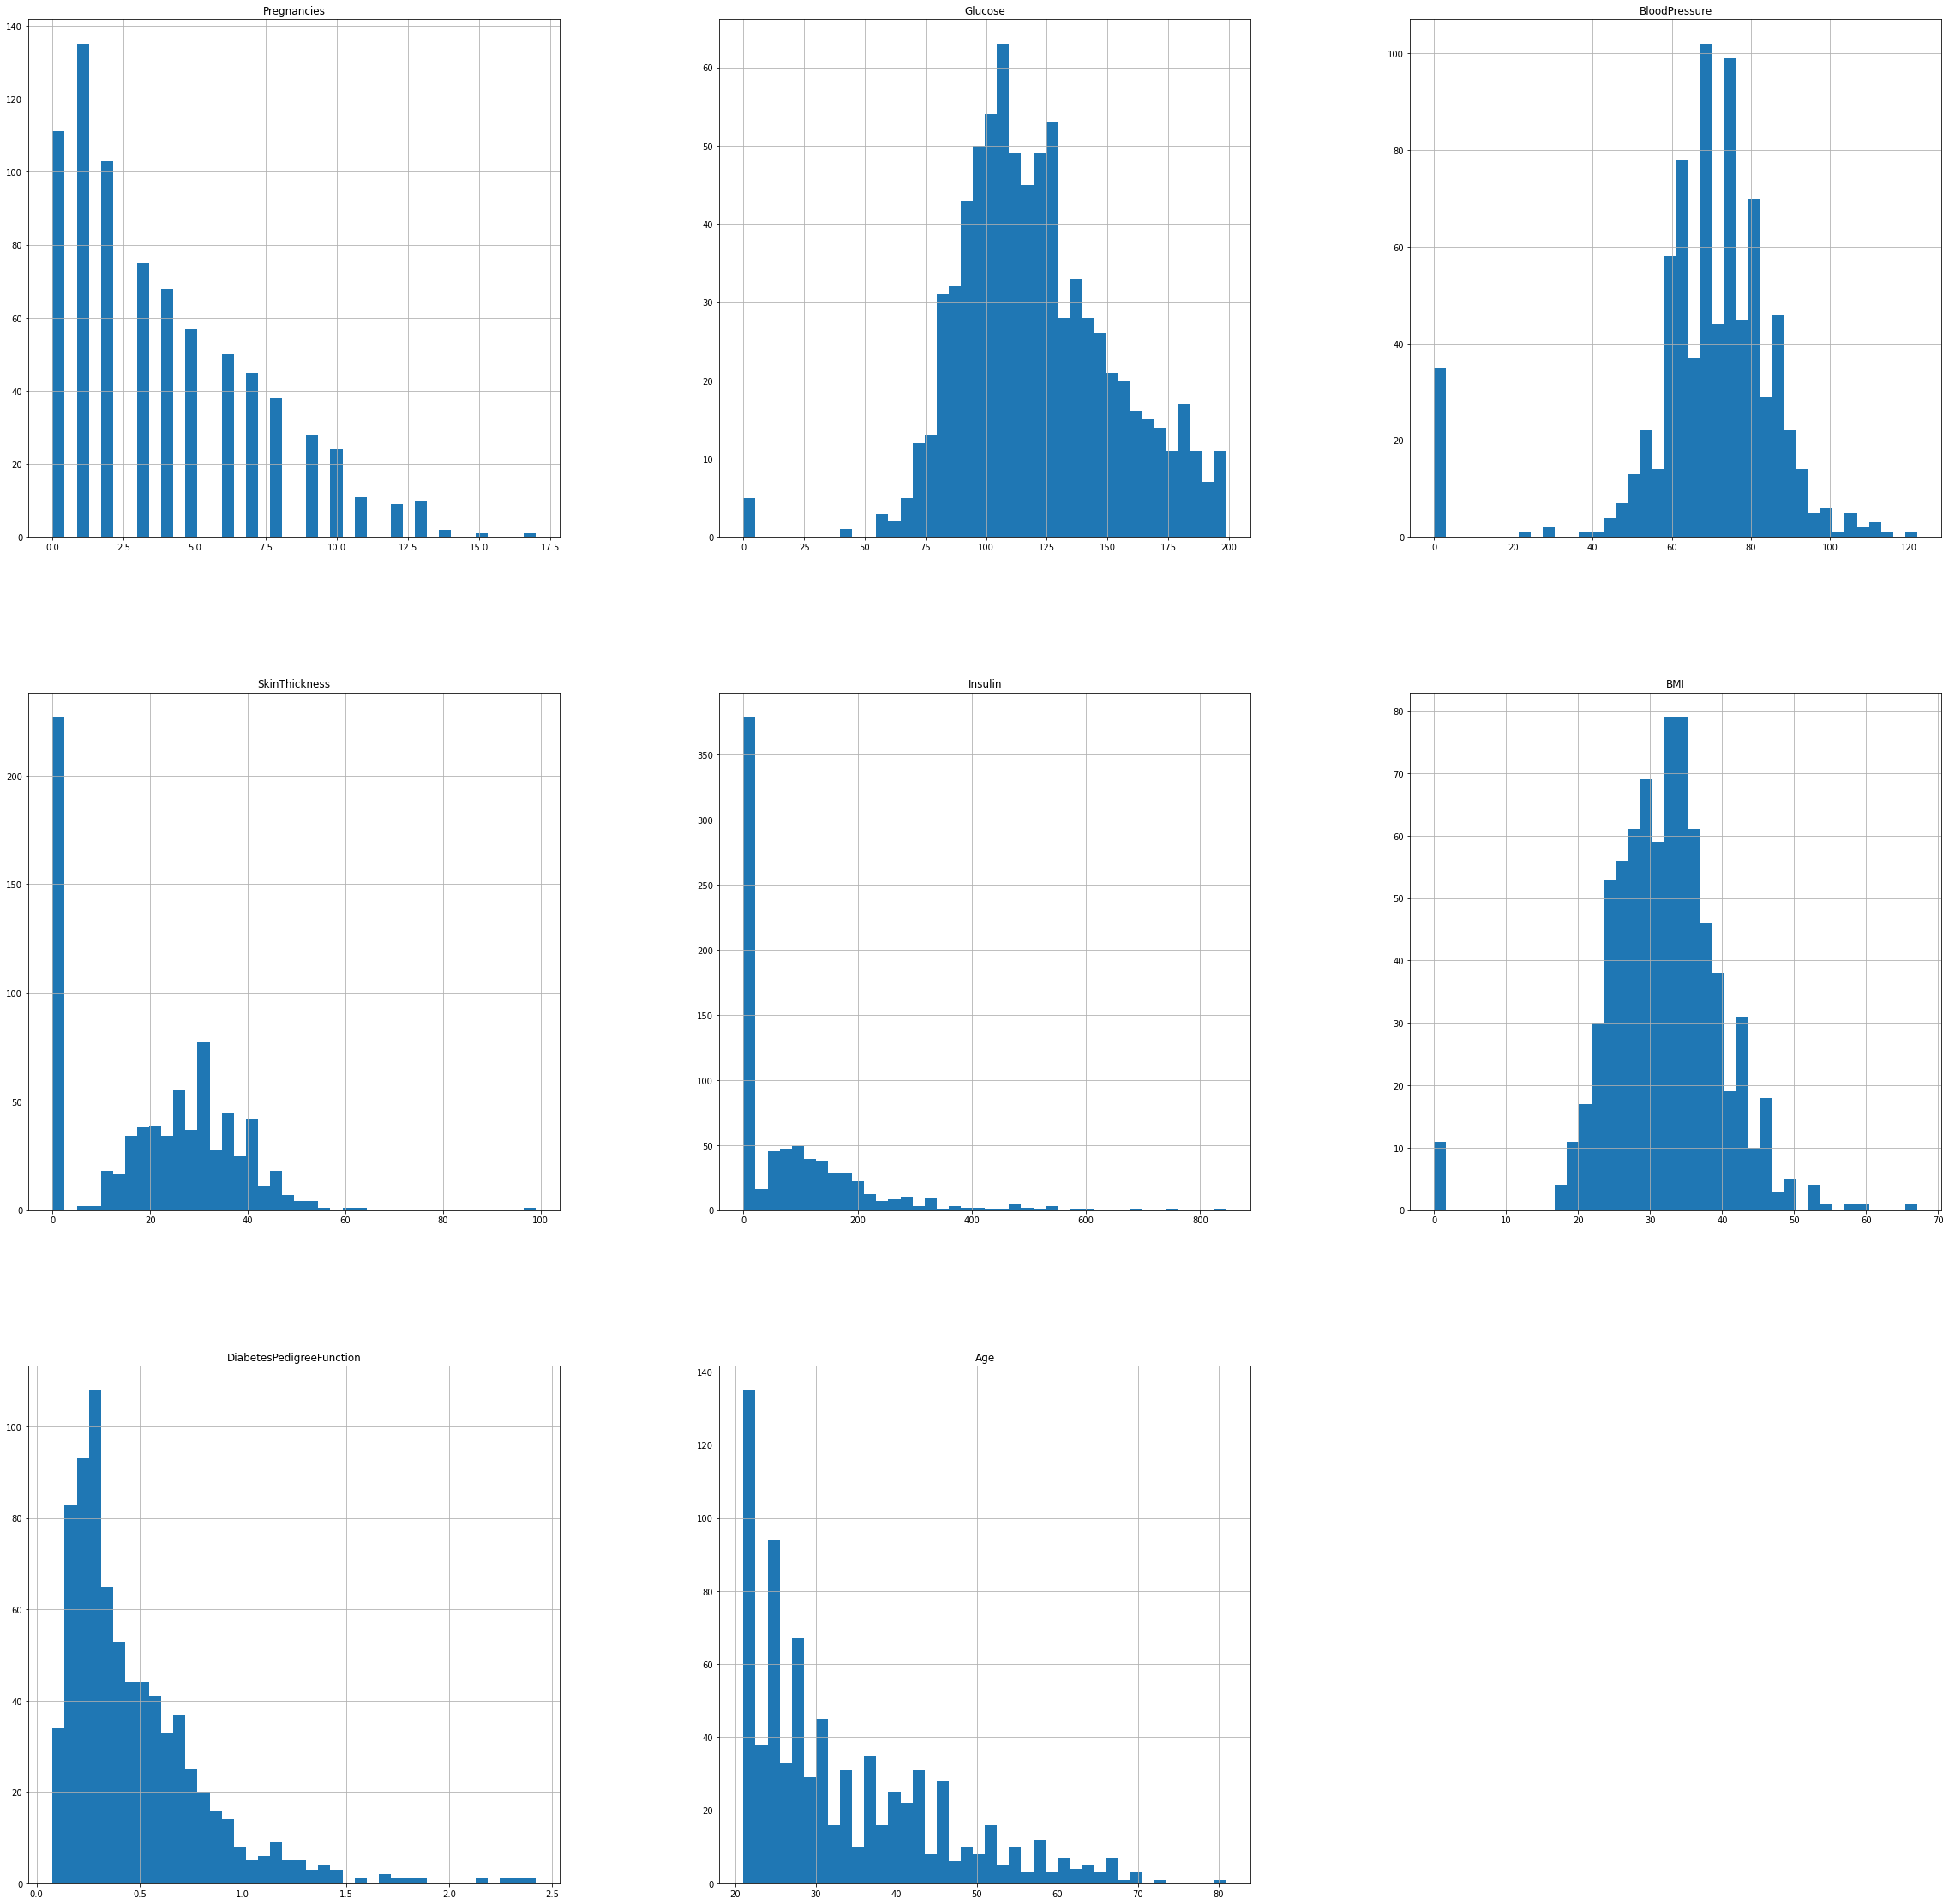

In [ ]:
#diabetes dataset in histogram 
Data_X=df.copy(deep=True)
Data_X=Data_X.drop(['Outcome'],axis=1)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[40,40]
#Plotting histogram of data
Data_X.hist(bins=40)
